In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def cost_function(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    cost = (1 / m) * np.sum(np.square((h - y)))
    return cost

def gradient_descent(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    dw = (1 / m) * np.sum(np.dot((h - y), X))
    db = (1 / m) * np.sum(h - y)
    return dw, db;

def feature_scaling(X, X_min, X_max):
    X = (X - X_min) / (X_max - X_min)
    return X

def predict(X_predict, X, w, b):
    y = b + w[0, 0] * X_predict + w[0, 1] * np.power(X_predict, 2) + w[0, 2] * np.power(X_predict, 3)
    return y

In [38]:
df = pd.read_csv("data/monthly_csv.csv")
df.head

<bound method NDFrame.head of         Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]>

In [39]:
# Load data into variables
array = df.to_numpy()

y = df.iloc[:, 1].to_numpy()
X = df.iloc[:, 0].str.replace("-", "").astype(int).to_numpy()

X_min = np.amin(X)
X_max = np.amax(X)

X = feature_scaling(X, X_min, X_max)
print(X[1:5])
print(y[1:5])


m = X.size

[0.00014273 0.00028547 0.0004282  0.00057094]
[34.73 34.73 34.73 34.73]


In [40]:
# Add polynomial features
X = X[None]

X2 = np.power(X, 2)
X3 = np.power(X, 3)

X2_min = np.amin(X2)
X2_max = np.amax(X2)

X3_min = np.amin(X3)
X3_max = np.amax(X3)

X2 = feature_scaling(X2, X2_min, X2_max)
X3 = feature_scaling(X3, X3_min, X3_max)

X = np.append(X, X2, axis=0)
X = np.append(X, X3, axis=0)

X = X.T

print(X.shape)
print(X2.shape)


(847, 3)
(1, 847)


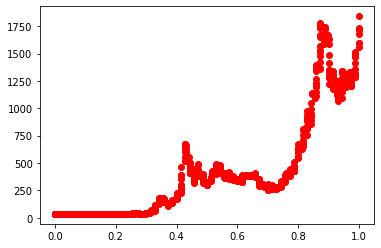

In [41]:
plt.scatter(X[:, 0].T, y, color="red")

In [42]:
# Model
w = np.random.rand(3)[None]
b = 0

iterations = 1000
learning_rate = 0.05

for i in range(iterations):
    cost = cost_function(X, y, m, w, b)
    print("Cost: " + str(cost))
    dw, db = gradient_descent(X, y, m, w, b)
    w = w - learning_rate * dw
    b = b - learning_rate * db

Cost: 378139.08193626394
Cost: 302439.80554105714
Cost: 245098.06038659922
Cost: 201620.1350695544
Cost: 168613.51665801837
Cost: 143517.0049792591
Cost: 124396.9724166877
Cost: 109793.557777932
Cost: 98604.55601762547
Cost: 89997.7650330401
Cost: 83344.81506111925
Cost: 78171.2155615769
Cost: 74118.64488492034
Cost: 70916.48217398097
Cost: 68360.31634528539
Cost: 66295.72215750813
Cost: 64606.01247212776
Cost: 63202.992193608734
Cost: 62019.97821729728
Cost: 61006.53001715767
Cost: 60124.47161916577
Cost: 59344.888460095026
Cost: 58645.86020164424
Cost: 58010.749128576565
Cost: 57426.90796624816
Cost: 56884.70432510035
Cost: 56376.78417277732
Cost: 55897.51575310669
Cost: 55442.56972854363
Cost: 55008.602161230156
Cost: 54593.01512998171
Cost: 54193.77595732816
Cost: 53809.28068369279
Cost: 53438.25094591761
Cost: 53079.65607473099
Cost: 52732.65423184987
Cost: 52396.54792183671
Cost: 52070.75035709346
Cost: 51754.76001743846
Cost: 51448.1413972513
Cost: 51150.51042502582
Cost: 50861.

Cost: 40896.7942438609
Cost: 40896.794243854005
Cost: 40896.7942438473
Cost: 40896.79424384077
Cost: 40896.79424383443
Cost: 40896.79424382828
Cost: 40896.794243822296
Cost: 40896.79424381648
Cost: 40896.79424381083
Cost: 40896.79424380533
Cost: 40896.79424379999
Cost: 40896.7942437948
Cost: 40896.79424378976
Cost: 40896.79424378485
Cost: 40896.79424378008
Cost: 40896.794243775454
Cost: 40896.79424377095
Cost: 40896.79424376659
Cost: 40896.79424376233
Cost: 40896.79424375819
Cost: 40896.794243754186
Cost: 40896.79424375027
Cost: 40896.79424374648
Cost: 40896.79424374279
Cost: 40896.794243739205
Cost: 40896.794243735734
Cost: 40896.79424373234
Cost: 40896.794243729055
Cost: 40896.794243725846
Cost: 40896.79424372275
Cost: 40896.79424371972
Cost: 40896.794243716795
Cost: 40896.79424371394
Cost: 40896.79424371117
Cost: 40896.79424370847
Cost: 40896.79424370586
Cost: 40896.79424370331
Cost: 40896.794243700846
Cost: 40896.79424369842
Cost: 40896.794243696095
Cost: 40896.79424369381
Cost: 40

In [43]:
print("w: " + str(w))
print("b: " + str(b))
print(w[0, 0])
print(X.shape)
print(X2.shape)
print(X3.shape)

w: [[470.66889749 471.09401604 471.25136857]]
b: -91.44104339978848
470.6688974853045
(847, 3)
(1, 847)
(1, 847)


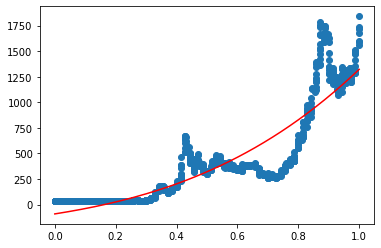

In [44]:
plt.plot(X[:, 0], (b + w[0, 0] * X[:, 0] + w[0, 1] * X2 + w[0, 2] * X3).T, "-r")
plt.scatter(X[:, 0].T, y)
plt.show()

In [45]:
# Prediction
X_predict = feature_scaling(202509, X_min, X_max)
y_pred = predict(X_predict, X, w, b)
print("Predicted price for 2021-08: " + str(y_pred))

Predicted price for 2021-08: 1533.9584527490213


In [46]:
# ------------------------------------------------------------------------------

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression().fit(X, y)

In [49]:
score = model.score(X, y)
print("Score: " + str(score))
print("b: " + str(model.intercept_))
print("w: " + str(model.coef_))

Score: 0.8477931420440767
b: -66.10461427828773
w: [ 1445.3529964  -3577.7935015   3816.96463199]


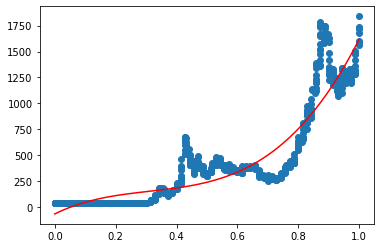

In [50]:
plt.plot(X[:, 0], (model.intercept_ + model.coef_[0] * X[:, 0] + model.coef_[1] * X2 + model.coef_[2] * X3).T, "-r")
plt.scatter(X[:, 0].T, y)
plt.show()

In [62]:
y_pred = model.intercept_ + np.sum(model.coef_ * feature_scaling(202509, X_min, X_max))
print(y_pred)

1739.1204991615175
